### Importing Data
####

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train_data.csv', delimiter=' ::: ',header= None ,engine='python', names=['Title', 'Genre', 'Description'])

In [3]:
train_df

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [4]:
test_df = pd.read_csv('test_data.csv', delimiter=' ::: ',header= None ,engine='python', names=['Title','Description'])

In [5]:
test_df

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),Before he was known internationally as a marti...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...
54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,..."
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ..."


#### Data Essentials

In [6]:
train_df.shape

(54214, 3)

In [7]:
rows=len(train_df)
rows

54214

In [8]:
cols=len(train_df.columns)
cols

3

In [9]:
print('The dataset contains {} rows and {} columns'.format(rows,cols))

The dataset contains 54214 rows and 3 columns


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [11]:
train_df.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy o...
freq,1,13613,12


In [12]:
train_df.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

##### To check the duplicate values

In [13]:
train_df.duplicated().sum()

0

### Data Preprocessing
####

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping



from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
nltk.download('stopwords') ##NLTK to download stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:


input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)

     # remove digits
    text = re.sub(f'[{string.digits}]',' ',text) 
    
    # tokenize and convert to list
    tokens = nltk.tokenize.word_tokenize(text)


    text =  re.sub(r'pic.\S+', '',text) 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text+' ')      # keep words with length>1 only

    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

# Test your cleaning function
#input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
#print(f'Original text: {input_text}')
print(f'Simple Cleaned text: {preprocessing(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Simple Cleaned text: certainly get dramatic boost hello bye hi iv iemk yee


In [20]:
train_df['Cleaned_Description'] = train_df.Description.apply(preprocessing)

In [21]:
train_df

,Title,Genre,Description,Cleaned_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parents yearold ...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,films title refers unrecovered bodies ground z...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,shortlived nbc live sitcom centered bonino wor...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",ze bestaan echt standup comedy growing facing ...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,walter vivian live country difficult time keep...


In [22]:
train_df.drop(['Title'],axis=1) ##Eliminating Irrelevant Columns

,Genre,Description,Cleaned_Description
1,drama,Listening in to a conversation between his doc...,listening conversation doctor parents yearold ...
2,thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...
3,adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...
4,drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...
5,drama,The film's title refers not only to the un-rec...,films title refers unrecovered bodies ground z...
...,...,...,...
54210,comedy,This short-lived NBC live sitcom centered on B...,shortlived nbc live sitcom centered bonino wor...
54211,horror,The NEXT Generation of EXPLOITATION. The siste...,next generation exploitation sisters kapa bay ...
54212,documentary,"Ze bestaan echt, is a stand-up comedy about gr...",ze bestaan echt standup comedy growing facing ...
54213,comedy,Walter and Vivian live in the country and have...,walter vivian live country difficult time keep...


### Data Visualization 
####

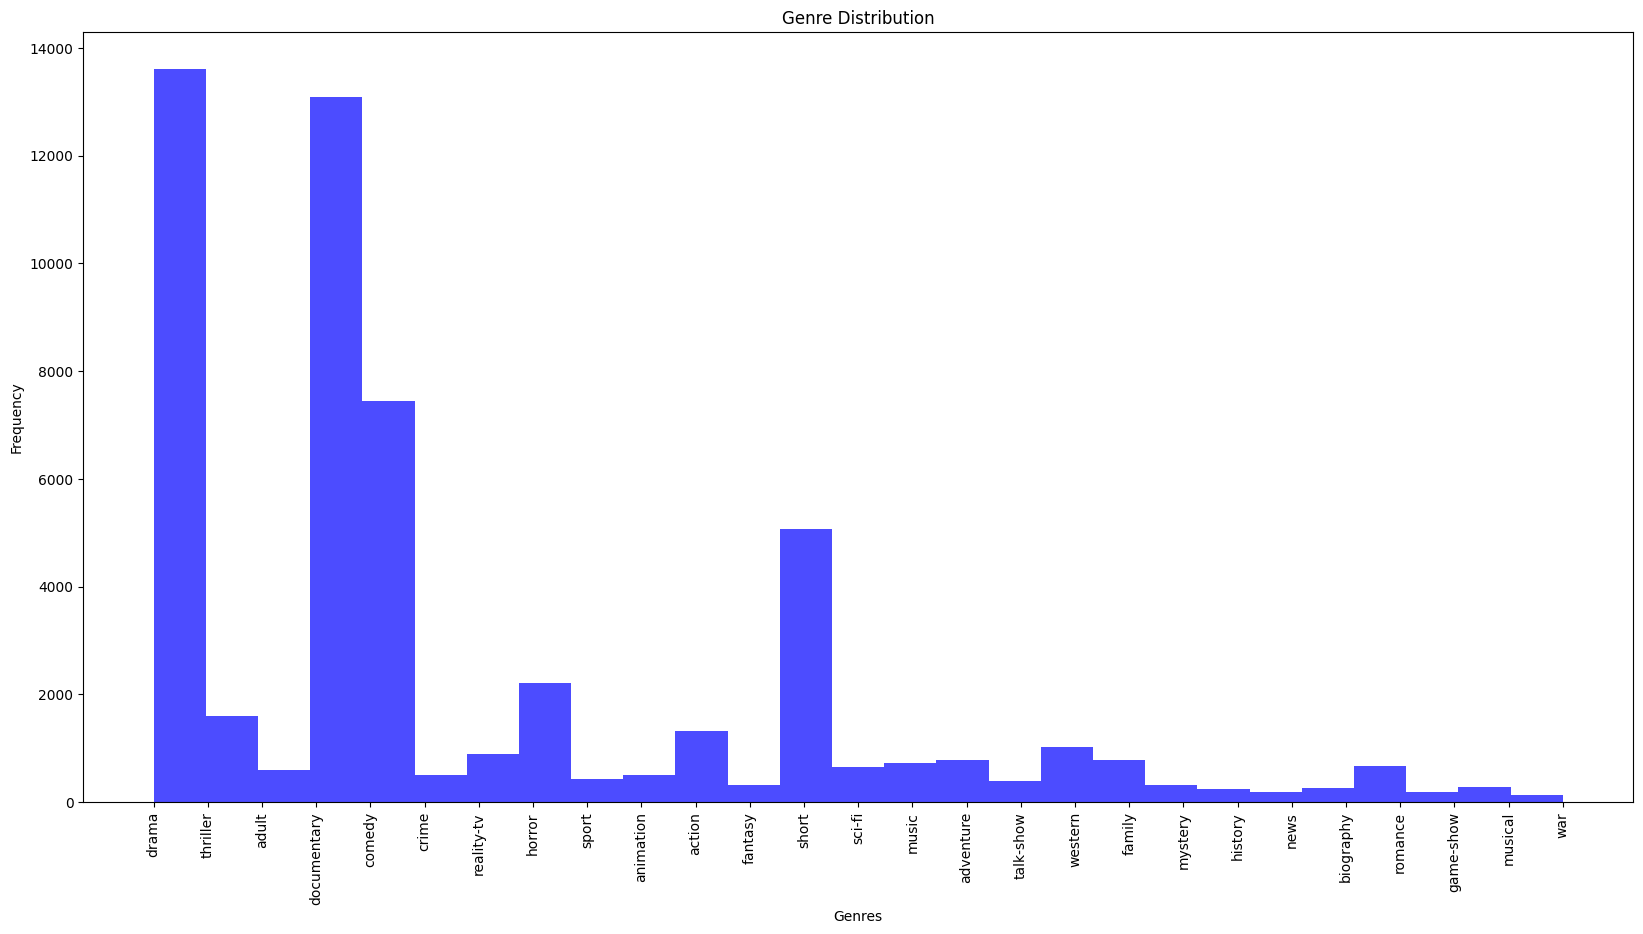

In [23]:
plt.figure(figsize=(20, 10))
plt.hist(train_df["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [24]:
genre_count = train_df.Genre.value_counts()
genre_count

drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: Genre, dtype: int64

Text(0, 0.5, 'Genre')

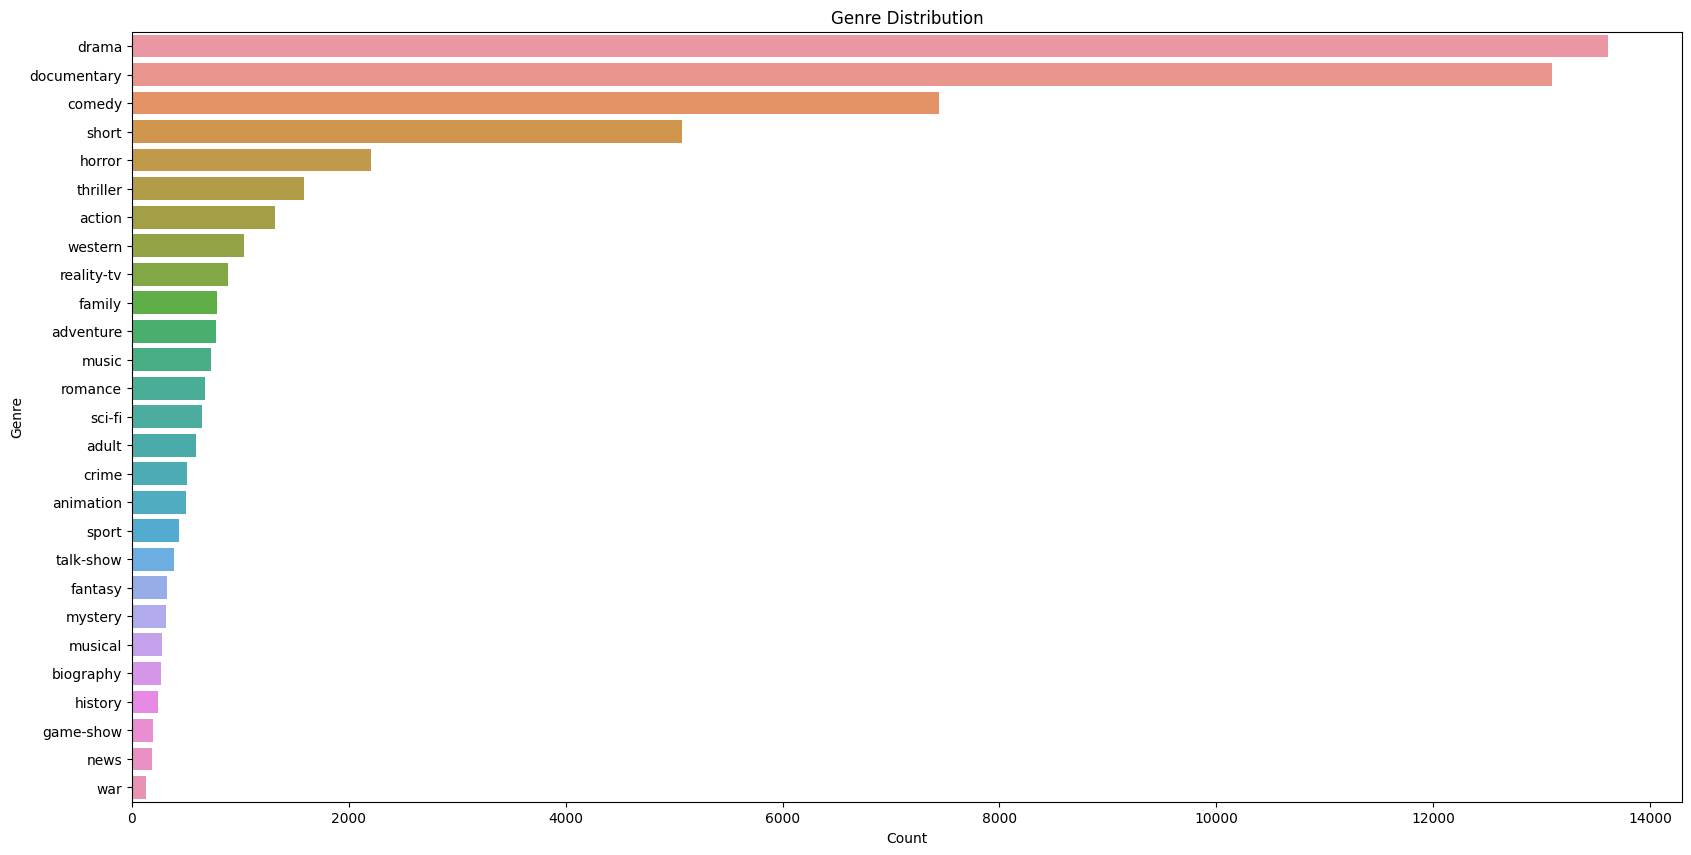

In [25]:
plt.figure(figsize=(20, 10))
sns.barplot(x=genre_count, y=genre_count.index, orient='h')
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')

In [26]:
genre_total=genre_count.sum()
genre_total

54214

In [27]:
genre_cumulative=(genre_count/genre_total).cumsum()
genre_cumulative

drama          0.251098
documentary    0.492659
comedy         0.630022
short          0.723595
horror         0.764249
thriller       0.793596
action         0.817851
western        0.836887
reality-tv     0.853193
family         0.867654
adventure      0.881949
music          0.895433
romance        0.907828
sci-fi         0.919762
adult          0.930645
crime          0.939960
animation      0.949146
sport          0.957114
talk-show      0.964327
fantasy        0.970284
mystery        0.976169
musical        0.981278
biography      0.986166
history        0.990648
game-show      0.994227
news           0.997565
war            1.000000
Name: Genre, dtype: float64

Text(0, 0.5, 'Genre')

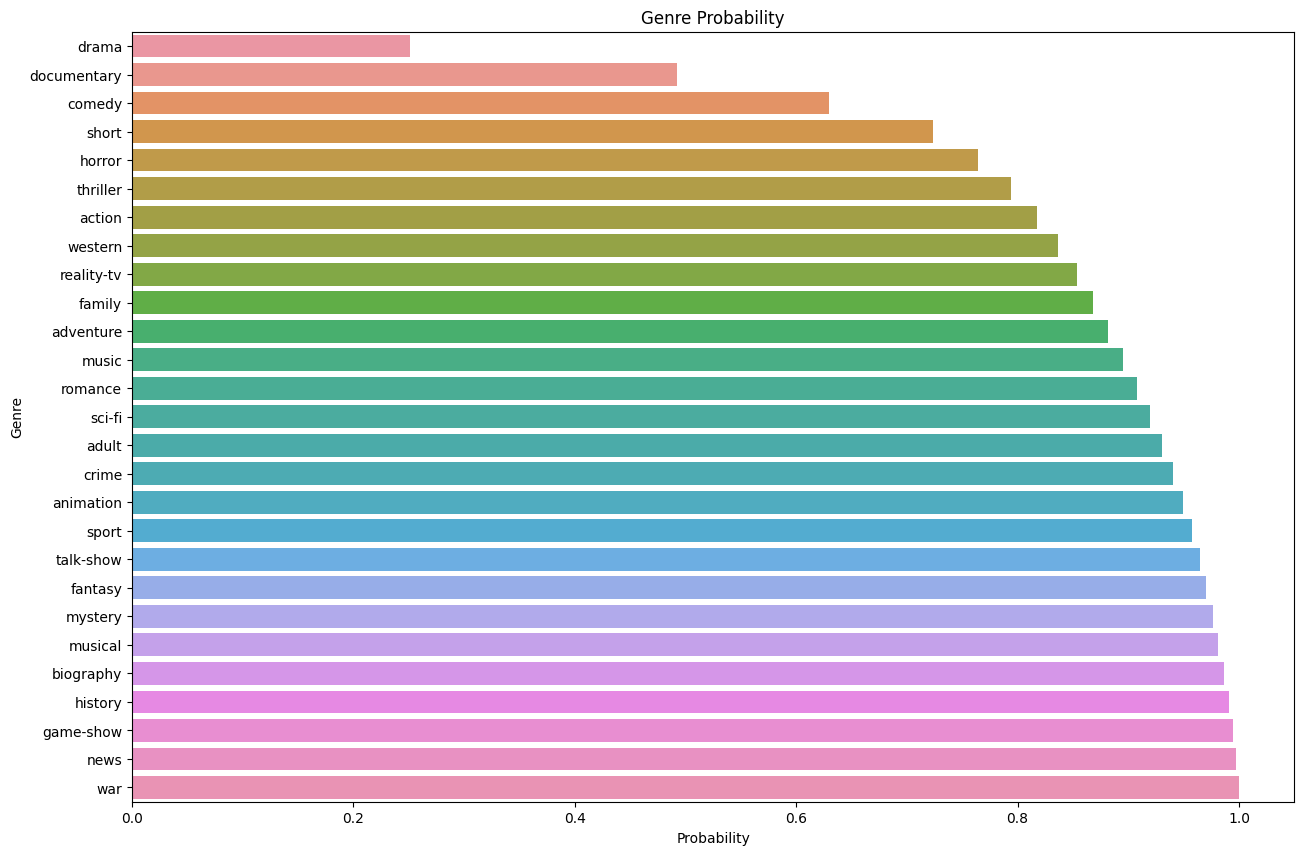

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x=genre_cumulative, y=genre_count.index, orient='h')
plt.title('Genre Probability')
plt.xlabel('Probability')
plt.ylabel('Genre')

### Model Training 
####

#### Encoding to transform

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['Encoded_Genre'] = label_encoder.fit_transform(train_df['Genre'])

In [30]:
train_df

,Title,Genre,Description,Cleaned_Description,Encoded_Genre
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parents yearold ...,8
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...,24
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...,1
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...,8
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,films title refers unrecovered bodies ground z...,8
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,shortlived nbc live sitcom centered bonino wor...,5
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,next generation exploitation sisters kapa bay ...,13
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",ze bestaan echt standup comedy growing facing ...,7
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,walter vivian live country difficult time keep...,5


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [32]:
x = train_df["Cleaned_Description"]
y = train_df["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3)

In [33]:
x_test

39174    brazil group people live lives dictatorship eu...
7488     story david classic story told modern times st...
5672     bennie somewhat reluctant drug courier korean ...
12875    za chlebem bread expression used poland since ...
16863    army officer bahadur singh recalled duty day w...
                               ...                        
37653    last song tells bittersweet story somying dawr...
8921     western sahara immense desert area atlantic co...
15605    rusty young backpacking south america heard th...
53867    professor green sets discover modern face home...
16894    psychiatric nurse toni helps suicidewatch pati...
Name: Cleaned_Description, Length: 16265, dtype: object

### Logistic Regression

##### Model training using CountVectorizer technique

In [34]:
vectorize = CountVectorizer()
x_train_vec = vectorize.fit_transform(x_train)
x_test_vec =  vectorize.transform(x_test)

In [35]:
x_train_vec

<37949x119254 sparse matrix of type '<class 'numpy.int64'>'
	with 1849847 stored elements in Compressed Sparse Row format>

In [36]:
x_test_vec

<16265x119254 sparse matrix of type '<class 'numpy.int64'>'
	with 762651 stored elements in Compressed Sparse Row format>

In [37]:
class_names= list(label_encoder.classes_)
class_names   

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [ ]:
model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(x_train_vec ,y_train)
print("Model Score on Training data",model.score(x_train_vec ,y_train))
print("Model Score on Training data",model.score(x_test_vec ,y_test))
y_pred = model.predict(x_test_vec)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

##### Model training without CountVectorizer technique

model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Training data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Prediction on Test Dataset 

In [ ]:
#test_df = pd.read_csv('test_data.csv', delimiter=' ::: ',header= None ,engine='python', names=['Title','Description'])

In [ ]:
#test_df

In [ ]:
test_df['Cleaned_Description'] = test_df.Description.apply(preprocessing)
test_df=test_df.drop(['Title','Description'],axis=1)

In [ ]:
test_df

In [ ]:
x_test_2 =  vectorize.transform(test_df['Cleaned_Description'])

In [ ]:
model.fit(x_train_vec ,y_train)


In [ ]:
test_df['Genre_predicted']=model.predict(x_test_2)

In [ ]:
test_df

### MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))
 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()    

In [ ]:
mnb.fit(x_train1 ,y_train)
test_df['Genre_predicted']=mnb.predict(x_test_2)
test_df